# RQ1: Can LLM detect bug-fix-related diffs from tangled commits?

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from modules.Untangler import GeminiUntangler, OpenAIUntangler, FreeUntangler

In [2]:
df = pd.read_csv("./data/Complete_GoldSet.csv")

In [131]:
os.makedirs("./Results/RQ1", exist_ok=True)

# gpt-4o-mini

In [132]:
model_name = "gpt-4o-mini"
untangler = OpenAIUntangler(model_name, 0, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"./Results/RQ1/{model_name}.csv", index = False)

1776it [00:00, 20770.83it/s]
1776it [20:43,  1.43it/s]


              precision    recall  f1-score   support

       Buggy       0.75      0.89      0.82       900
    NotBuggy       0.87      0.70      0.77       876

    accuracy                           0.80      1776
   macro avg       0.81      0.79      0.79      1776
weighted avg       0.81      0.80      0.79      1776



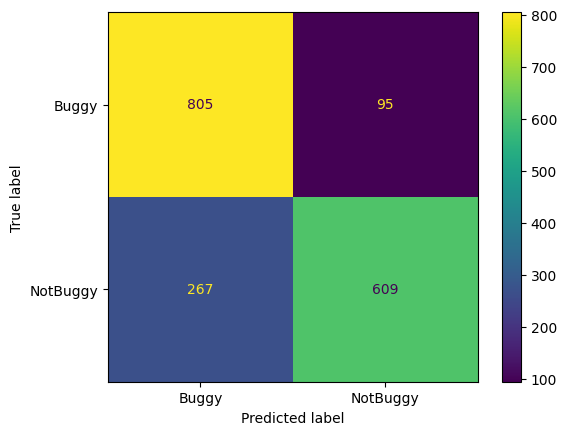

In [134]:
result = pd.read_csv(f"./Results/RQ1/{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))
cm = confusion_matrix(result["Decision"], result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

              precision    recall  f1-score   support

       Buggy       0.69      0.89      0.78       168
    NotBuggy       0.80      0.54      0.65       144

    accuracy                           0.73       312
   macro avg       0.75      0.71      0.71       312
weighted avg       0.74      0.73      0.72       312



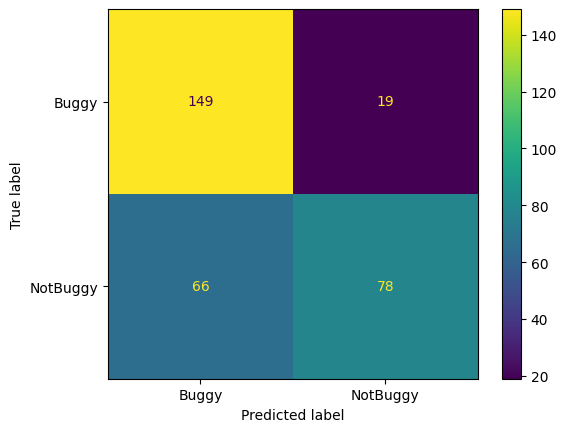

In [135]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

# gpt-4o

In [136]:
model_name = "gpt-4o"
untangler = OpenAIUntangler(model_name, 0, False)
result = untangler.batch_detect(df, iteratively=False)
result.to_csv(f"./Results/RQ1/{model_name}.csv", index = False)

1776it [00:00, 20739.66it/s]
1776it [06:04,  4.87it/s]


In [137]:
result = pd.read_csv(f"./Results/RQ1/{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

              precision    recall  f1-score   support

       Buggy       0.86      0.87      0.86       900
    NotBuggy       0.86      0.86      0.86       876

    accuracy                           0.86      1776
   macro avg       0.86      0.86      0.86      1776
weighted avg       0.86      0.86      0.86      1776



              precision    recall  f1-score   support

       Buggy       0.74      0.83      0.78       168
    NotBuggy       0.77      0.66      0.71       144

    accuracy                           0.75       312
   macro avg       0.75      0.74      0.74       312
weighted avg       0.75      0.75      0.75       312



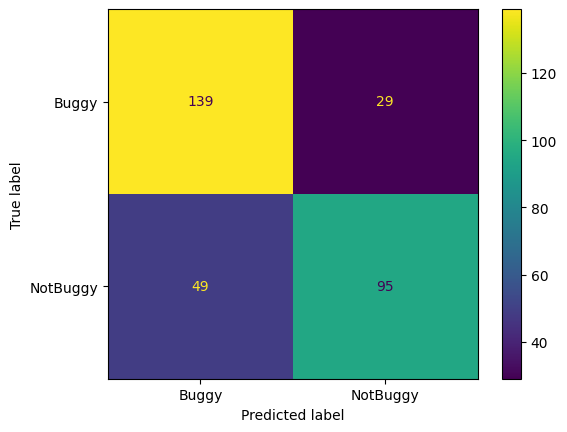

In [138]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

# gemini-2.0-flash

In [ ]:
model_name = "gemini-2.0-flash"
untangler = GeminiUntangler(model_name, 0, False)
result = untangler.batch_detect(df)
result["Detection"] = result["Detection"].apply(lambda x: x.strip())
result.to_csv(f"./Results/RQ1/{model_name}.csv", index = False)

1776it [12:44,  2.32it/s]


In [11]:
result = pd.read_csv(f"./Results/RQ1/{model_name}.csv")
print(classification_report(result["Decision"], result["Detection"]))

              precision    recall  f1-score   support

       Buggy       0.62      0.97      0.75       900
    NotBuggy       0.92      0.38      0.54       876

    accuracy                           0.68      1776
   macro avg       0.77      0.67      0.65      1776
weighted avg       0.76      0.68      0.65      1776



              precision    recall  f1-score   support

       Buggy       0.56      0.93      0.70       168
    NotBuggy       0.65      0.14      0.23       144

    accuracy                           0.57       312
   macro avg       0.60      0.54      0.46       312
weighted avg       0.60      0.57      0.48       312



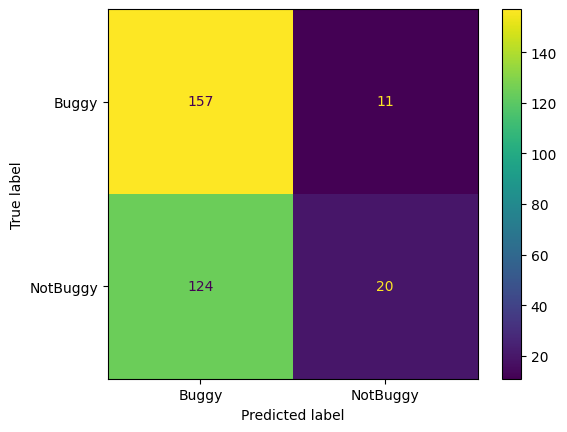

In [12]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()

# codellama/CodeLlama-7b-hf

In [ ]:
model_name = "codellama/CodeLlama-7b-hf"
untangler = FreeUntangler(model_name, 0, False)
result = untangler.batch_detect(df[:2])
result["Detection"] = result["Detection"].apply(lambda x: x.strip())
result.to_csv(f"./Results/RQ1/{model_name.replace("/","-")}.csv", index = False)

In [ ]:
result = pd.read_csv(f"./Results/RQ1/{model_name.replace("/","-")}.csv")
print(classification_report(result["Decision"], result["Detection"]))

In [ ]:
g = pd.read_csv("./data/GoldSet.csv")
filtered_result = result[result['CommitHash'].isin(g['CommitHash'])]
print(classification_report(filtered_result["Decision"], filtered_result["Detection"]))
cm = confusion_matrix(filtered_result["Decision"], filtered_result["Detection"], labels=["Buggy", "NotBuggy"])
fig = ConfusionMatrixDisplay(cm, display_labels=["Buggy", "NotBuggy"])
fig.plot()